In [1]:
% matplotlib inline

import numpy as np
import numpy.ma as ma
import pandas as pd
from math import *
import matplotlib.pyplot as plt
import scipy.io as sio
from mpl_toolkits.basemap import Basemap, cm
import seawater as sw

import MITgcmutils as mit
from MITgcmutils import cs

from matplotlib import rcParams, rc
rcParams.update({'figure.autolayout': True})
rcParams.update({'font.family': 'serif'})
rcParams.update({'font.serif': 'Times New Roman'})


/Users/sclayton/anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [2]:
# import the data to plot
CRindir = '/Volumes/My Passport/coarse_run/'
HRindir = '/Volumes/My Passport/high_res/'

#import grid params for CR grid

in_file = '%sgrid/HFacC.data' % CRindir
HFCR = np.fromfile(in_file, dtype = '>f')
HFCR = HFCR.reshape(23, 160, 360)

in_file = '%sgrid/XC.data' % CRindir
XC = np.fromfile(in_file, dtype = '>f')
XC = XC.reshape(160,360)

in_file = '%sgrid/YC.data' % CRindir
YC = np.fromfile(in_file, dtype = '>f')
YC = YC.reshape(160,360)

in_file = '/Users/sclayton/Documents/darwin_model/eg_grid/RA.data'
RA = np.fromfile(in_file, dtype = '>f')
RA = RA.reshape(160,360)

# import CR data
in_file = '/Users/sclayton/Google Drive/work/comparison/data/monthly/CR/CRWN.monthly1999.data'
CRWN = np.fromfile(in_file, dtype='>f').reshape(4 , 12, 160, 360)

# import HR data
infile = '/Users/sclayton/Google Drive/work/comparison/data/monthly/HR2CR/HR2CR_WN.1999.data'
HRWN = np.fromfile(infile, dtype = '>f').reshape(4, 12, 160, 360)

In [4]:
for m in range(0,12):
    for v in range(4):
        tmp = HRWN[v, m,:,:]
        tmp[[HFCR[6,:,:] == 0]] = np.nan
        HRWN[v, m,:,:] = tmp

        tmp = CRWN[v,m,:,:]
        tmp[[HFCR[6,:,:] == 0]] = np.nan
        CRWN[v,m,:,:] = tmp

binnedcr = np.nanmean(CRWN, axis = 3)
binnedhr = np.nanmean(HRWN, axis = 3)

/Users/sclayton/anaconda/lib/python2.7/site-packages/numpy/lib/nanfunctions.py:675: RuntimeWarning: Mean of empty slice
  warnings.warn("Mean of empty slice", RuntimeWarning)


(3,)


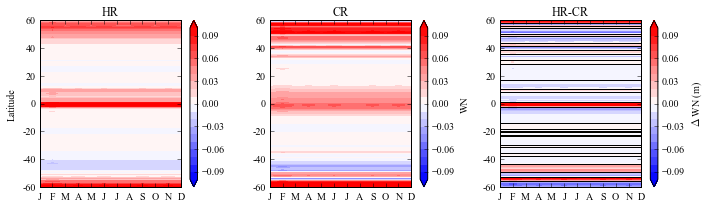

In [38]:
palette1 = plt.get_cmap('bwr', 51)
palette2 = plt.get_cmap('RdYlBu_r', 50)

months = ['J', 'F', 'M', 'A', 'M', 'J', 'J', 'A', 'S', 'O','N', 'D']
lats = range(-60,70,20)

v = 1

f1, axarr = plt.subplots(1,3, figsize=(10, 3), dpi = 600)
print np.shape(axarr)

## MLD ##
h1 = axarr[0].contourf((binnedhr[v,:,:]).transpose(1,0), levels = np.arange(-0.1, 0.11, 0.01),cmap=palette1, extend = 'both')
#axarr[0].contour(binnedhr[v, :,:].transpose(1,0), levels = [0], colors='k', linestyles='solid')
cbar1 = plt.colorbar(h1, ax=axarr[0])
axarr[0].axis([ 0,11,20,140])
axarr[0].set_yticks(range(20,150,20))
axarr[0].set_yticklabels(lats)
axarr[0].set_xticks(range(0, 12, 1))
axarr[0].set_xticklabels(months)
axarr[0].set_title('HR')
axarr[0].set_ylabel('Latitude')

c1 = axarr[1].contourf((binnedcr[v,:,:]).transpose(1,0), levels = np.arange(-0.1, 0.11, 0.01),cmap=palette1, extend = 'both')
#axarr[1].contour((binnedcr[v, :,:]).transpose(1,0), levels = [0], colors='k', linestyles='solid')
cbar2 = plt.colorbar(c1, ax=axarr[1])
cbar2.set_label('WN', rotation=90)
axarr[1].axis([ 0,11,20,140])
axarr[1].set_yticks(range(20,150,20))
axarr[1].set_yticklabels(lats)
axarr[1].set_xticks(range(0, 12, 1))
axarr[1].set_xticklabels(months)
axarr[1].set_title('CR')

d1 = axarr[2].contourf(((binnedhr[v, :,:]-binnedcr[v, :,:])).transpose(1,0), levels = np.arange(-0.1, 0.11, 0.01),cmap=palette1, extend = 'both')
axarr[2].contour((binnedhr[v, :,:]-binnedcr[v, :,:]).transpose(1,0), levels = [0], colors='k', linestyles='solid')
cbar3 = plt.colorbar(d1, ax=axarr[2])
cbar3.set_label(r'$\Delta$ WN (m)', rotation=90)
axarr[2].axis([ 0,11,20,140])
axarr[2].set_yticks(range(20,150,20))
axarr[2].set_yticklabels(lats)
axarr[2].set_xticks(range(0, 12, 1))
axarr[2].set_xticklabels(months)
axarr[2].set_title('HR-CR')


plt.show()